# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (activity - 6/02/07)
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port douglas
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 5 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 6 of Set 1 | quellon
City not found. Skipping...
Processing Record 7 of Set 1 | nshamba
City not found. Skipping...
Processing Record 8 of Set 1 | masaya sur
City not found. Skipping...
Processing Record 9 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | sylhet
City not found. Skipping...
Processing Record 12 of Set 1 | jiwani
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 14 of Set 1 | aa

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palembang,-2.9167,104.7458,26.05,94,40,1.03,ID,1715101404
1,auki,-8.7676,160.7034,25.55,91,93,2.40,SB,1715101404
2,albany,42.6001,-73.9662,23.84,39,0,0.89,US,1715101404
3,yellowknife,62.4560,-114.3525,11.34,69,75,5.66,CA,1715101184
4,ribeira grande,38.5167,-28.7000,20.22,88,40,7.15,PT,1715101404


In [381]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palembang,-2.9167,104.7458,26.05,94,40,1.03,ID,1715101404
1,auki,-8.7676,160.7034,25.55,91,93,2.40,SB,1715101404
2,albany,42.6001,-73.9662,23.84,39,0,0.89,US,1715101404
3,yellowknife,62.4560,-114.3525,11.34,69,75,5.66,CA,1715101184
4,ribeira grande,38.5167,-28.7000,20.22,88,40,7.15,PT,1715101404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

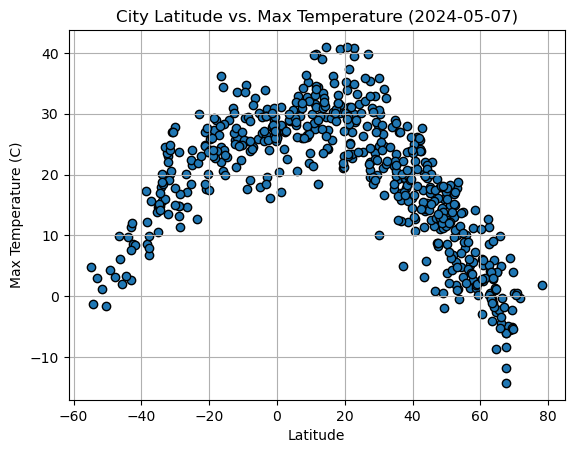

In [72]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="tab:blue", edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024-05-07)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

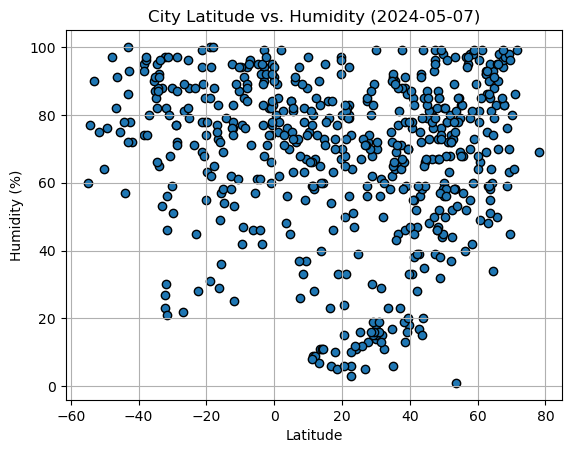

In [73]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="tab:blue", edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-05-07)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

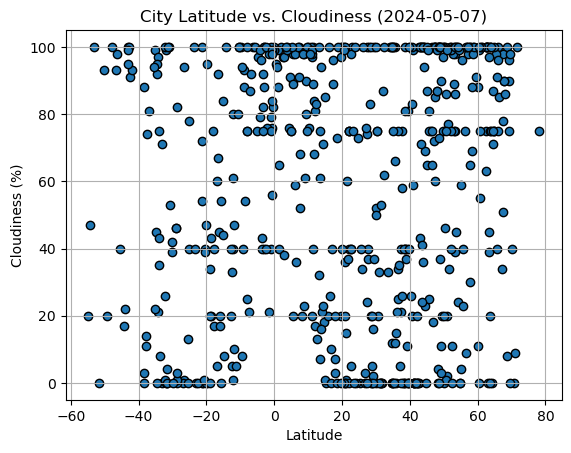

In [74]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="tab:blue", edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-05-07)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

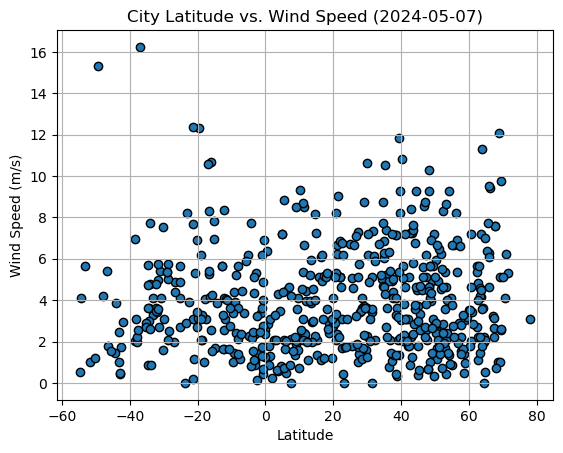

In [207]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="tab:blue", edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-05-07)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [370]:
import scipy.stats as st
# Define a function to create Linear Regression plots (act 05/03/08)
def plot_linear_regression(x, y, hemisphere):
    # Determine the hemisphere
    if hemisphere == 'Northern':
        condition = x >= 0
        hemisphere_label = 'Northern Hemisphere'
    elif hemisphere == 'Southern':
        condition = x < 0
        hemisphere_label = 'Southern Hemisphere'
        
    # Filter data based on hemisphere
    x_hemi = x[condition]
    y_hemi = y[condition]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x_hemi, y_hemi)
    
    # Plot data and regression line
    plt.scatter(x_hemi, y_hemi, label=hemisphere_label)
    plt.plot(x_hemi, slope * x_hemi + intercept, color='red', label='Linear Regression')

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(equation, (0.5, 0.9), fontsize=12, color='red', ha='center', va='center', xycoords='axes fraction')

In [371]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
#northern_hemi_df = northern_hemi_df.count()
# Display sample data
northern_hemi_df.head()
#northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,23.84,39,0,0.89,US,1715101404
3,yellowknife,62.4560,-114.3525,11.34,69,75,5.66,CA,1715101184
4,ribeira grande,38.5167,-28.7000,20.22,88,40,7.15,PT,1715101404
5,quang ngai,15.1167,108.8000,24.24,95,85,1.36,VN,1715101297
7,ixtapa,20.7000,-105.2000,33.94,24,100,3.15,MX,1715101121


In [372]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
#southern_hemi_df = southern_hemi_df.count()
# Display sample data
southern_hemi_df.head()
#southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palembang,-2.9167,104.7458,26.05,94,40,1.03,ID,1715101404
1,auki,-8.7676,160.7034,25.55,91,93,2.40,SB,1715101404
6,blackmans bay,-43.0167,147.3167,11.40,86,100,0.45,AU,1715101404
12,grytviken,-54.2811,-36.5092,-1.34,77,47,4.09,GS,1715101405
14,touros,-5.1989,-35.4608,30.06,61,75,6.19,BR,1715101405


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8575556651379208


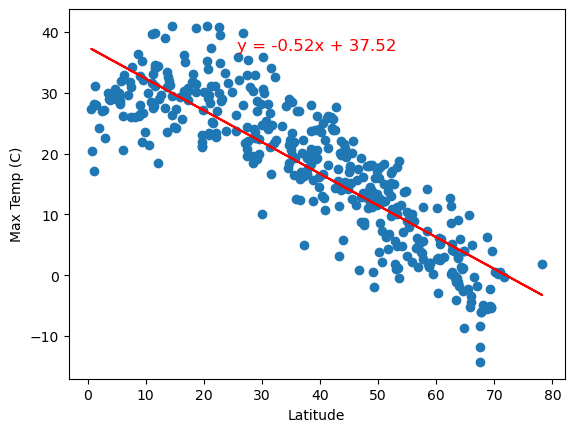

In [373]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
  
plot_linear_regression(x_values, y_values, hemisphere='Northern')

The r-value is: 0.8062302536302285


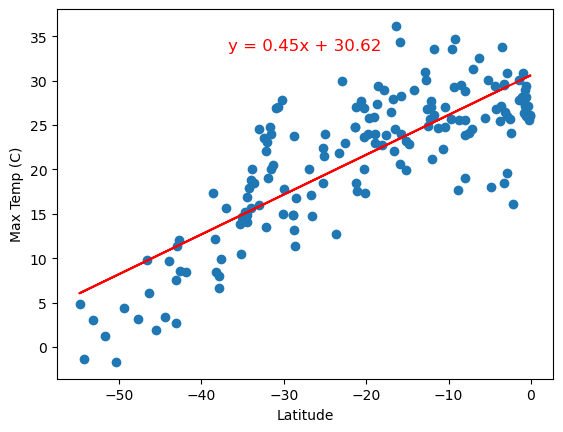

In [374]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
    
plot_linear_regression(x_values, y_values, hemisphere='Southern')

**Discussion about the linear relationship:** Northern hemisphere there is a strong negative correlation meaning as the latitude increases, the temperature decreases.  Southern hemisphere there is a strong positive correlation, as the latitude increase or gets closer to zero, the temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21570704325218973


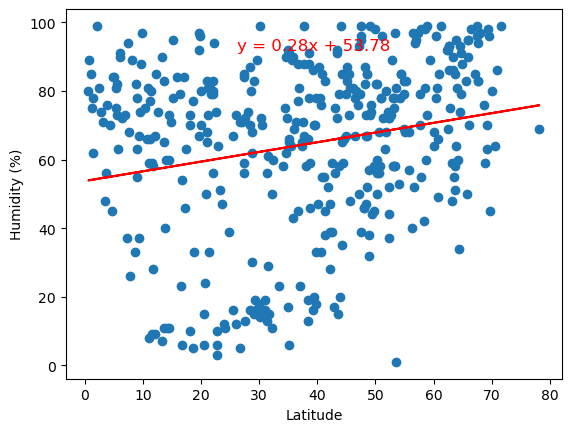

In [375]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plot_linear_regression(x_values, y_values, hemisphere='Northern')

The r-value is: 0.0013458273014030873


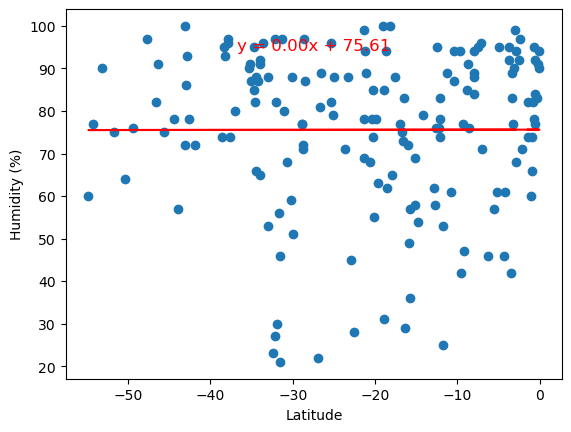

In [376]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
   
plot_linear_regression(x_values, y_values, hemisphere='Southern')

**Discussion about the linear relationship:** The northern hemisphere has a weak positive correlation, as you move north humidity tends to increase slightly.  The southern hemisphere there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0730675558804478


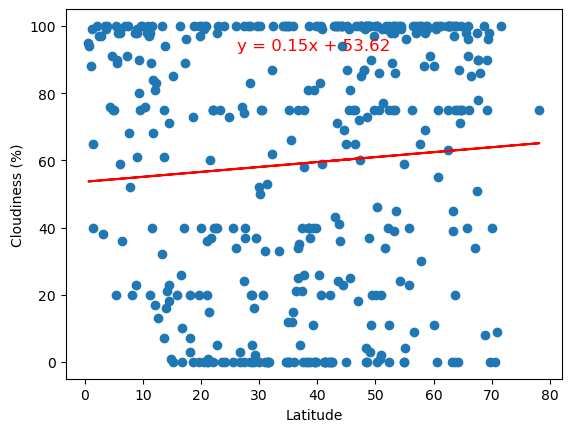

In [377]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plot_linear_regression(x_values, y_values, hemisphere='Northern')

The r-value is: 0.19256846649189052


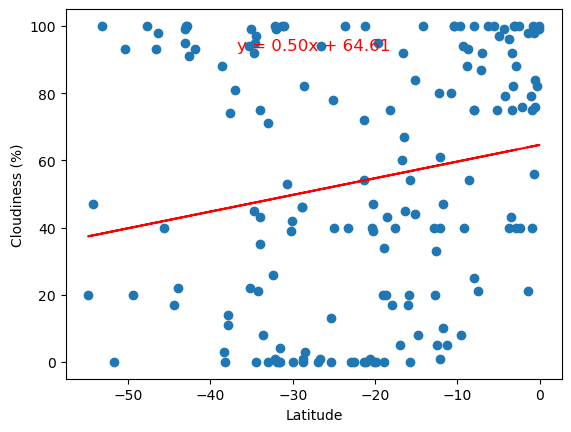

In [378]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plot_linear_regression(x_values, y_values, hemisphere='Southern')

**Discussion about the linear relationship:** Both hemispheres have weak positive correlation between cloudiness and latitude with the southern being slightly strongly.  This means that as you move north, the cloudiness % tends to increase slightly.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09077167106117007


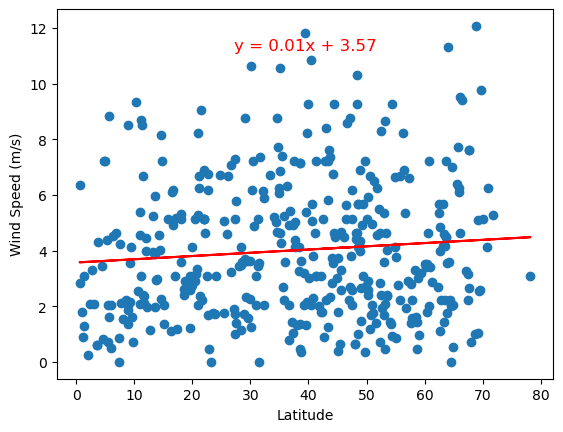

In [379]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plot_linear_regression(x_values, y_values, hemisphere='Northern')

The r-value is: -0.07067833993799337


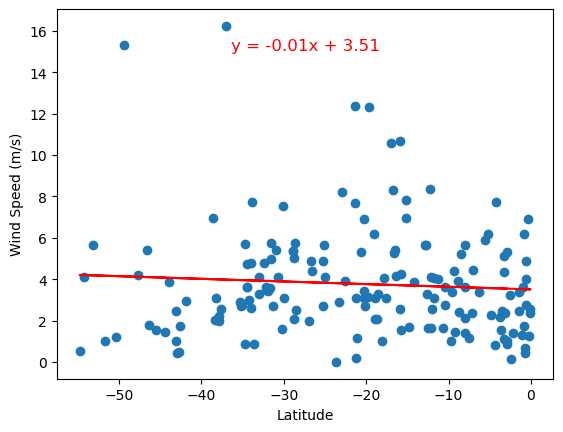

In [380]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

print(f"The r-value is: {(st.pearsonr(x_values, y_values)[0])}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plot_linear_regression(x_values, y_values, hemisphere='Southern')

**Discussion about the linear relationship:** Northern has a weak positive correlation, as you move north the wind speed tends to increase very slightly.  Southern there is a weak negative correlation, as you move north the wind speed tends to decrease slightly.